# Analyse wage.csv

## What do we aim for?

1. Understand how `wage` depends on `age`?
1. Understand how `wage` depends on both `education` and `race`?

## What do we need to do?

1. Read file
2. Inspect data
3. Perform analysis
  - create plots
  - compute statistics

## Why we need to understand Python to efficiently work with scientific Python libs

In [1]:
path = './data/wage.csv'
path

'./data/wage.csv'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plotnine uses similar syntax like ggplot

In [3]:
# pd.read_csv?  # to ask for what the object is doing

In [4]:
# help(pd.read_csv) # to ask for what the object is doing

In [5]:
df = pd.read_csv(path, index_col=0)
df.head()

year  age      sex            maritl      race        education  \
231655  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Male  1. Never Married  1. White  4. College Grad   
161300  2003   45  1. Male        2. Married  1. White  3. Some College   
155159  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
11443   2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   
155159  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes   
11443   2. Middle Atlantic  2. Information       1. <=Good     1. Yes   

         logwage        wage  
231655  4.318063   75.043154  
86582   4.255273   70.476020  
161300  4.875061  130.982177  
155159  5.041393  154.685293  
11443   4.318063   75.043154

In [6]:
df.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [7]:
df.describe(include='all')

year          age      sex      maritl      race   education  \
count   3000.000000  3000.000000     3000        3000      3000        3000   
unique          NaN          NaN        1           5         4           5   
top             NaN          NaN  1. Male  2. Married  1. White  2. HS Grad   
freq            NaN          NaN     3000        2074      2480         971   
mean    2005.791000    42.414667      NaN         NaN       NaN         NaN   
std        2.026167    11.542406      NaN         NaN       NaN         NaN   
min     2003.000000    18.000000      NaN         NaN       NaN         NaN   
25%     2004.000000    33.750000      NaN         NaN       NaN         NaN   
50%     2006.000000    42.000000      NaN         NaN       NaN         NaN   
75%     2008.000000    51.000000      NaN         NaN       NaN         NaN   
max     2009.000000    80.000000      NaN         NaN       NaN         NaN   

                    region       jobclass          health health_ins  \
count                 3000           3000            3000       3000   
unique                   1              2               2          2   
top     2. Middle Atlantic  1. Industrial  2. >=Very Good     1. Yes   
freq                  3000           1544            2142       2083   
mean                   NaN            NaN             NaN        NaN   
std                    NaN            NaN             NaN        NaN   
min                    NaN            NaN             NaN        NaN   
25%                    NaN            NaN             NaN        NaN   
50%                    NaN            NaN             NaN        NaN   
75%                    NaN            NaN             NaN        NaN   
max                    NaN            NaN             NaN        NaN   

            logwage         wage  
count   3000.000000  3000.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       4.653905   111.703608  
std        0.351753    41.728595  
min        3.000000    20.085537  
25%        4.447158    85.383940  
50%        4.653213   104.921507  
75%        4.857332   128.680488  
max        5.763128   318.342430

In [8]:
df.groupby('age')['wage'].median()

age
18    69.619037
19    54.598150
20    71.482747
21    72.150456
22    75.043154
        ...    
74    99.689464
75    69.389644
76    76.893603
77    99.689464
80    85.330335
Name: wage, Length: 61, dtype: float64

Text(0.5,1,'How wage depends on age')

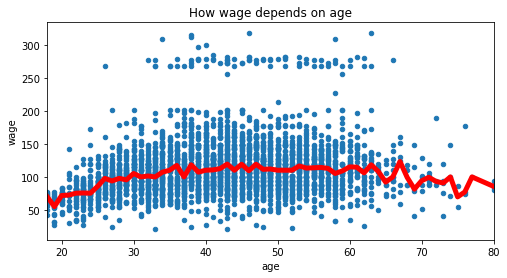

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
# change color
# set axis limits
df.groupby('age')['wage'].median().plot(ax=ax, color='r', linewidth=5)
df.plot.scatter(ax=ax, x='age', y='wage')
ax.set_title('How wage depends on age')

In [10]:
fig.savefig('wage_age_relationship.png')

In [11]:
wage_age_correlation = df[['wage', 'age']].corr()
wage_age_correlation

wage       age
wage  1.000000  0.195637
age   0.195637  1.000000

In [12]:
df_report = df.groupby(['education', 'race'])[['wage']].median() #  .to_frame('median wage')
df_report.head()

wage
education    race               
1. < HS Grad 1. White  81.283253
             2. Black  85.383940
             3. Asian  68.748088
             4. Other  73.775743
2. HS Grad   1. White  94.072715

In [13]:
df_report.to_excel('wage_report.xlsx')

In [14]:
order = sorted(df['education'].unique())
hue_order = sorted(df['race'].unique())

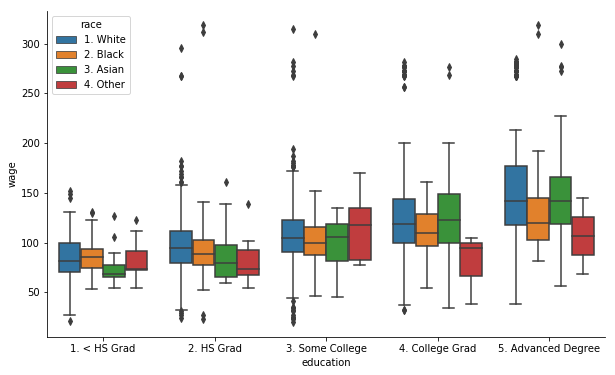

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(ax=ax, data=df, 
            y='wage', x='education', order=order,
            hue='race', hue_order=hue_order)
sns.despine()

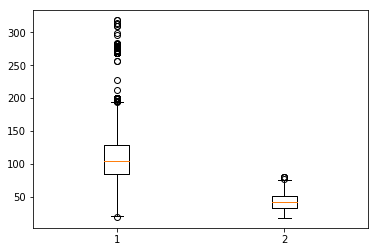

In [16]:
_ = plt.boxplot(df[['wage', 'age']].T)

In [17]:
timeseries = pd.DataFrame({'t': [0, 1, 2, 3, 4], 
                           'x': [1, 1, 3, 2, 4]})
timeseries

t  x
0  0  1
1  1  1
2  2  3
3  3  2
4  4  4

In [18]:
df['Wage']

KeyError: 'Wage'